In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [3]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Visualize the dataset

Target labels:  [6 9 6 1 3 8 0 1 5 1]


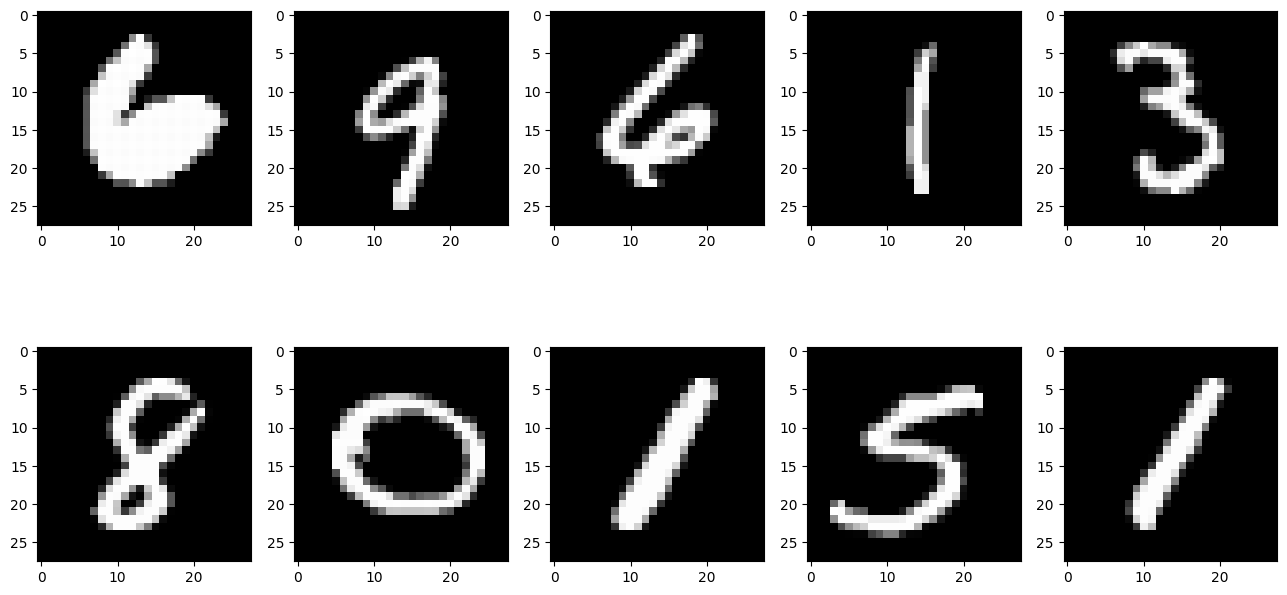

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [5]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [6]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [8]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8469 - loss: 0.5167
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9553 - loss: 0.1469
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9694 - loss: 0.1019
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9762 - loss: 0.0782
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9792 - loss: 0.0661
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9848 - loss: 0.0501
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9854 - loss: 0.0471
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9868 - loss: 0.0407
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9899 - loss: 0.0313
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9903 - loss: 0.0297


Plot the loss and accuracy graphs

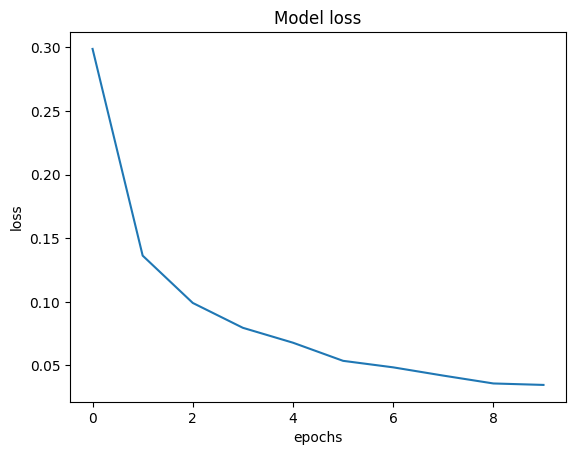

In [9]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

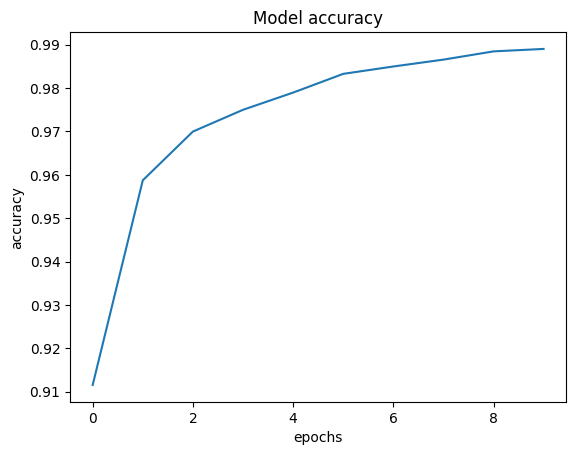

In [10]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [11]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.1026
Loss of the Test dataset is: 0.09531045705080032
Accuracy of the test dataset is: 0.974399983882904


Save the model weights

In [13]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

### A) Improve test accuracy by tuning hyperparameters
This cell builds a slightly larger MLP, uses a tuned learning rate, adds validation split + early stopping, and increases epochs/batch size.

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Clear any existing graph / model from memory
tf.keras.backend.clear_session()

# Model with a bit more capacity + He initialization
model_hp = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dense(64, activation='relu', kernel_initializer='he_normal'),
    Dense(10, activation='softmax')
])

# Slightly tuned optimizer hyperparameters
optimizer = Adam(learning_rate=0.001)

model_hp.compile(loss='categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_hp = model_hp.fit(
    new_train_data, new_train_target,
    epochs=30,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

loss_hp, acc_hp = model_hp.evaluate(new_test_data, new_test_target, verbose=0)
print(f"HP-tuned Test Accuracy: {acc_hp:.4f}, Test Loss: {loss_hp:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8205 - loss: 0.6215 - val_accuracy: 0.9597 - val_loss: 0.1411
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9537 - loss: 0.1538 - val_accuracy: 0.9710 - val_loss: 0.1034
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9704 - loss: 0.1014 - val_accuracy: 0.9755 - val_loss: 0.0847
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9768 - loss: 0.0798 - val_accuracy: 0.9773 - val_loss: 0.0800
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9825 - loss: 0.0573 - val_accuracy: 0.9788 - val_loss: 0.0708
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9863 - loss: 0.0451 - val_accuracy: 0.9775 - val_loss: 0.0754
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9895 - loss: 0.0356 - val_accuracy: 0.9748 - val_loss: 0.0841
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9910 - loss: 0.0295 - val_accuracy: 0.

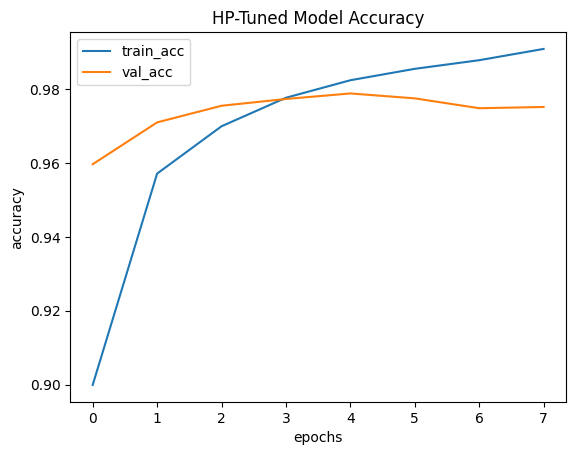

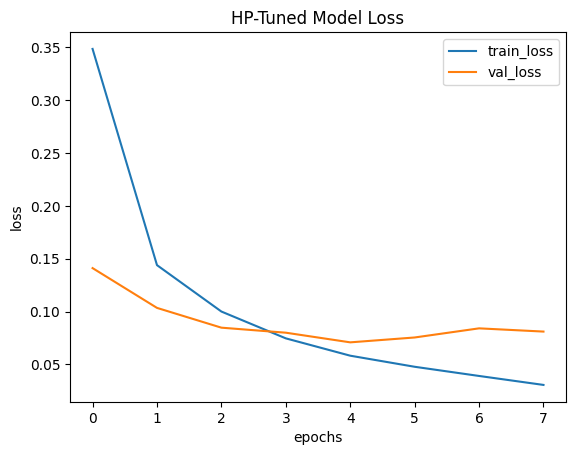

In [15]:
# Plot training curves for the tuned model
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_hp.history['accuracy'], label='train_acc')
plt.plot(history_hp.history['val_accuracy'], label='val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('HP-Tuned Model Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(history_hp.history['loss'], label='train_loss')
plt.plot(history_hp.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('HP-Tuned Model Loss')
plt.legend()
plt.show()

### B) Add L1 and L2 regularization and retrain
This cell adds combined L1+L2 (`l1_l2`) penalties to dense layers to reduce overfitting.

In [16]:
from tensorflow.keras import regularizers

tf.keras.backend.clear_session()

reg = regularizers.l1_l2(l1=1e-5, l2=1e-4)

model_reg = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=reg),
    Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=reg),
    Dense(10, activation='softmax')
])

model_reg.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

early_stop_reg = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_reg = model_reg.fit(
    new_train_data, new_train_target,
    epochs=30,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop_reg],
    verbose=1
)

loss_reg, acc_reg = model_reg.evaluate(new_test_data, new_test_target, verbose=0)
print(f"L1+L2 Test Accuracy: {acc_reg:.4f}, Test Loss: {loss_reg:.4f}")

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8173 - loss: 0.7047 - val_accuracy: 0.9627 - val_loss: 0.2117
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9551 - loss: 0.2261 - val_accuracy: 0.9688 - val_loss: 0.1739
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9697 - loss: 0.1744 - val_accuracy: 0.9713 - val_loss: 0.1740
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9758 - loss: 0.1480 - val_accuracy: 0.9777 - val_loss: 0.1460
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9801 - loss: 0.1326 - val_accuracy: 0.9775 - val_loss: 0.1403
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9852 - loss: 0.1189 - val_accuracy: 0.9792 - val_loss: 0.1368
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9860 - loss: 0.1130 - val_accuracy: 0.9763 - val_loss: 0.1464
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9885 - loss: 0.1037 - val_accuracy: 0.

### C) Visualize class-wise performance with a confusion matrix
Computes predictions on the test set and displays a confusion matrix.

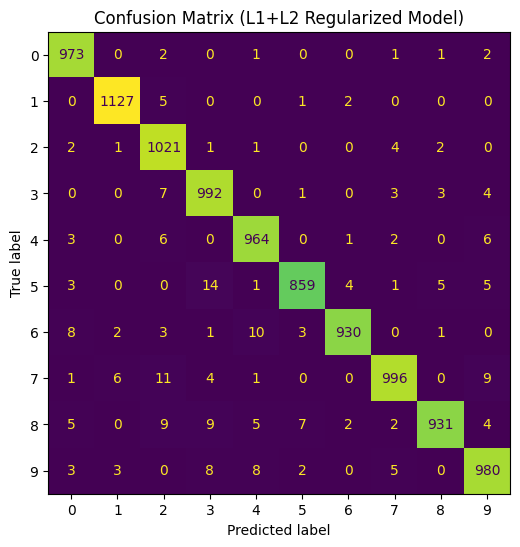

Classification Report (per-class precision/recall/F1):

              precision    recall  f1-score   support

           0     0.9749    0.9929    0.9838       980
           1     0.9895    0.9930    0.9912      1135
           2     0.9596    0.9893    0.9742      1032
           3     0.9640    0.9822    0.9730      1010
           4     0.9728    0.9817    0.9772       982
           5     0.9840    0.9630    0.9734       892
           6     0.9904    0.9708    0.9805       958
           7     0.9822    0.9689    0.9755      1028
           8     0.9873    0.9559    0.9713       974
           9     0.9703    0.9713    0.9708      1009

    accuracy                         0.9773     10000
   macro avg     0.9775    0.9769    0.9771     10000
weighted avg     0.9775    0.9773    0.9773     10000



In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Use the regularized model for evaluation (you can also switch to model_hp or your original 'model')
y_prob = model_reg.predict(new_test_data, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_target  # original integer labels

cm = confusion_matrix(y_true, y_pred, labels=list(range(10)))

fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(ax=ax, colorbar=False)
plt.title("Confusion Matrix (L1+L2 Regularized Model)")
plt.show()

print("Classification Report (per-class precision/recall/F1):\n")
print(classification_report(y_true, y_pred, digits=4))